# Medical cost prediction

## Imports

In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

## Data load

In [2]:
df = pd.read_csv('insurance.csv')

df['sex'] = df['sex'] == 'male'
df['smoker'] = df['smoker'] == 'yes'
df['region'] = df['region'].astype('category')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   bool    
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   bool    
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: bool(2), category(1), float64(2), int64(2)
memory usage: 46.1 KB


,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,True,southwest,16884.92400
1,18,True,33.770,1,False,southeast,1725.55230
2,28,True,33.000,3,False,southeast,4449.46200
3,33,True,22.705,0,False,northwest,21984.47061
4,32,True,28.880,0,False,northwest,3866.85520


## EDA

### Describe

In [3]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,True,NaN,NaN,False,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Corrleation matrix

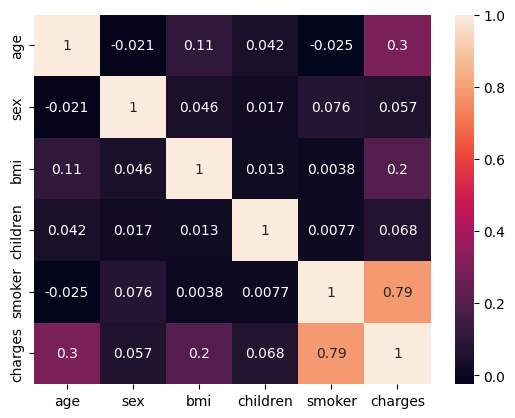

In [4]:
corr = df.drop(columns='region').corr()

sns.heatmap(corr, annot=True)
plt.show()

### Plots

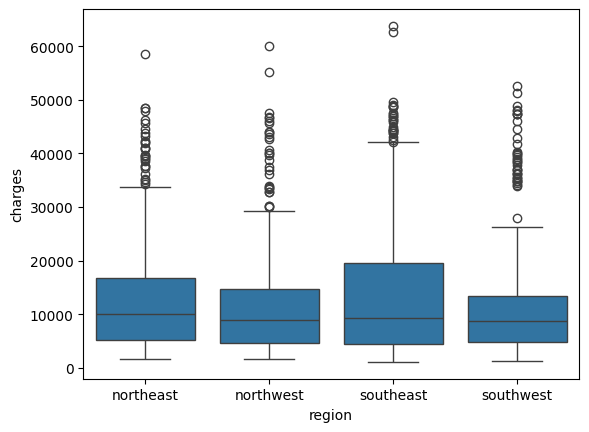

In [5]:
sns.boxplot(x='region', y='charges', data=df)
plt.show()

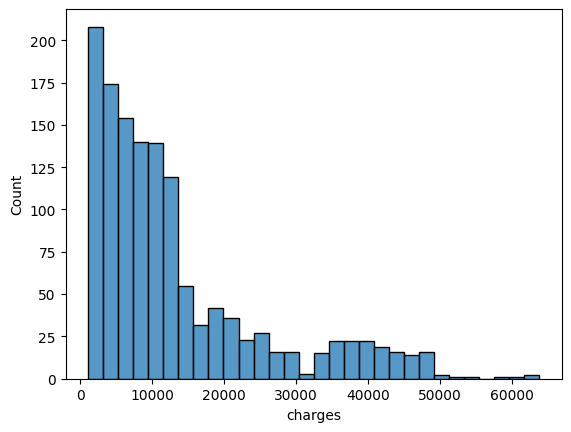

In [6]:
sns.histplot(df['charges'])
plt.show()

## Model

### Data transformation

In [7]:
df = pd.get_dummies(df)

print(df.head())

   age    sex     bmi  children  smoker      charges  region_northeast  \
0   19  False  27.900         0    True  16884.92400             False   
1   18   True  33.770         1   False   1725.55230             False   
2   28   True  33.000         3   False   4449.46200             False   
3   33   True  22.705         0   False  21984.47061             False   
4   32   True  28.880         0   False   3866.85520             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


### Build model

In [8]:
X = df.drop(columns='charges')
y = df['charges']

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', RandomForestRegressor(
        criterion='squared_error', 
        random_state=0,
        n_estimators=15,
        max_depth=5
    ))
])

### Validate model

In [9]:
pipeline_mse = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

print(f'Random Forest MSE: {np.mean(-pipeline_mse)}')

Random Forest MSE: 20961419.74064011


### Save model

In [10]:
pipeline.fit(X.to_numpy(), y.to_numpy())

joblib.dump(pipeline, 'model.joblib')

['model.joblib']